In [1]:
import matplotlib.pyplot as plt
import numpy as np
import control as ctrl


Ganho Kpo do sistema original: 10.0
Ganho proporcional necessário para o controlador PI (Kpi): 0.9
Constante de tempo integral (Ti) do controlador PI: 500.0
Função de transferência do controlador PI: <TransferFunction>: sys[1]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


450 s + 0.9
-----------
   500 s



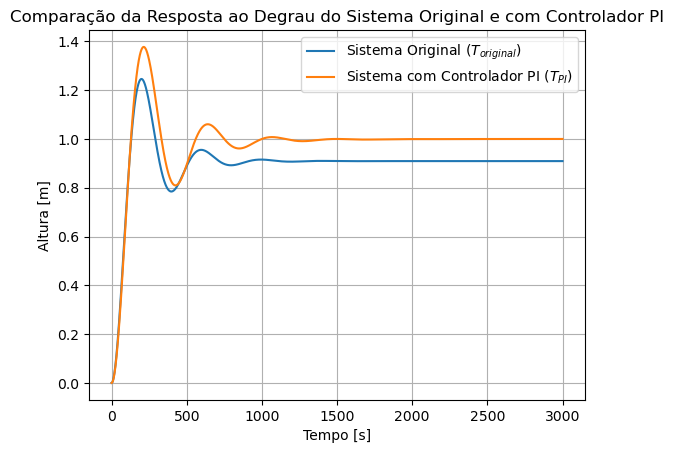

In [2]:

# Definindo a função de transferência do sistema original
num_sys = [0.25e-3] 
den_sys = [1, 2 * 5e-3, (5e-3)**2]
G = ctrl.tf(num_sys, den_sys)

# Calcular o ganho Kpo do sistema original
Kpo = ctrl.dcgain(G)
print(f"Ganho Kpo do sistema original: {Kpo}")

# Definir o erro de estado estacionário desejado (10% de erro, ou seja, 0.1)
err = 0.1

# Calcular o ganho proporcional necessário para o controlador PI
Kpi = (1 - err) / (err * Kpo) 
print(f"Ganho proporcional necessário para o controlador PI (Kpi): {Kpi}")

# Definir a constante integral Ti
# Aqui, Ti é escolhido como o inverso de um polo dominante do sistema original, onde esse polo é (5e-3)
Ti = 2.5 / (5e-3)  # Ajuste conforme necessário
print(f"Constante de tempo integral (Ti) do controlador PI: {Ti}")

# Criar a função de transferência do controlador PI: PI(s) = (Kpi * Ti * s + Kpi) / (Ti * s)
PI = ctrl.tf([Kpi * Ti, Kpi], [Ti, 0])
print(f"Função de transferência do controlador PI: {PI}")

# Definindo a função de transferência do sistema com controlador PI
Sis_Controlado = PI * G 


# Criar o sistema em malha fechada T1 (original) e T2 (com controlador PI)
T1 = ctrl.feedback(G, 1)  # Sistema original em malha fechada
T2 = ctrl.feedback(Sis_Controlado, 1)  # Sistema com controlador PI em malha fechada

# Simular a resposta ao degrau
t = np.linspace(0, 3000, 10000)  # Tempo de simulação
t1, y1 = ctrl.step_response(T1, T=t)  # Resposta ao degrau do sistema original
t2, y2 = ctrl.step_response(T2, T=t)  # Resposta ao degrau do sistema com controlador PI

# Plotando ambas as respostas ao degrau no mesmo gráfico
plt.figure()
plt.plot(t1, y1, label='Sistema Original ($T_{original}$)')
plt.plot(t2, y2, label='Sistema com Controlador PI ($T_{PI}$)')
# Adicionando rótulos e título
plt.title('Comparação da Resposta ao Degrau do Sistema Original e com Controlador PI')
plt.xlabel('Tempo [s]')
plt.ylabel('Altura [m]')
plt.grid()
plt.legend()
plt.savefig('comparacao_resposta_degrau.png')
plt.show()
